<a href="https://colab.research.google.com/github/nywoo-o/HWrepo/blob/master/hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/DwG/crayons_mosaic.bmp')
#np.uint8(mpimg.imread(stream)*255.0)

plt.axis("off")
plt.imshow(img, cmap='gray', vmin=0, vmax=256)
plt.plot()

print(img.max())

w=600
h=480
channels=3

In [1]:
kernel_size = 3
kernel = np.array(
  [[0,1, 0],
  [1, 0, 1],
  [0, 1, 0]]
)

x_kernel = np.array(
  [[1,0, 1],
  [0, 0, 0],
  [1, 0, 1]]
)

v_kernel = np.array(
  [[0,1, 0],
  [0, 0, 0],
  [0, 1, 0]]
)

h_kernel = np.array(
  [[0,0, 0],
  [1, 0, 1],
  [0, 0, 0]]
)

my_kernel = np.array(
  [[1,0, 1],
  [0, 4, 0],
  [1, 0, 1]]
)


k = int(kernel_size/2)

print(kernel.shape[0])
print(k)

#bayer format is R Gr Gb B

w = img.shape[0]
h = img.shape[1]
rgb_img = np.zeros((w, h, 3), dtype=np.float32)
rg_img= np.zeros((w, h), dtype=np.float32)

print(w, h, k)

for i in np.arange(w):
  for j in np.arange(h):
    if (i >= k) and (i <= (w - k - 1)):
      if (j >= k) and (j <= (h - k - 1)):
        
        if ((i%2)==0) and ((j%2)==0):
          channel = 0; #R
        elif ((i%2)==1) and ((j%2)==0):
          channel = 2; #GB
        elif ((i%2)==0) and ((j%2)==1):
          channel = 1; #GR
        elif ((i%2)==1) and ((j%2)==1):
          channel = 3; #B
        
        rowL = max(i-k, 0); rowR = min(i+k+1, w);
        colL = max(j-k, 0); colR = min(j+k+1, h);
        image = img[rowL:rowR, colL:colR]
        if (channel==0):
          rgb_img[i][j][0] = img[i][j]
          rgb_img[i][j][1] = np.sum(image * kernel)/4
          rgb_img[i][j][2] = np.sum(image * x_kernel)/4
        elif (channel==3):
          rgb_img[i][j][2] = img[i][j]
          rgb_img[i][j][1] = np.sum(image * kernel)/4
          rgb_img[i][j][0] = np.sum(image * x_kernel)/4
        elif (channel==1):
          rgb_img[i][j][0] = np.sum(image * h_kernel)/2
          rgb_img[i][j][1] = np.sum(image * my_kernel)/8
          rgb_img[i][j][2] = np.sum(image * v_kernel)/2
        elif (channel==2):
          rgb_img[i][j][0] = np.sum(image * v_kernel)/2
          rgb_img[i][j][1] = np.sum(image * my_kernel)/8
          rgb_img[i][j][2] = np.sum(image * h_kernel)/2
        
      

        
g_img = rgb_img[:, :, 1];
rg_img = rgb_img[:, :, 0]-g_img;
bg_img = rgb_img[:, :, 2]-g_img;
  
rg_img = ndimage.median_filter(rg_img, size=10);
bg_img = ndimage.median_filter(bg_img, size=10);
    
r_new_img = rg_img+g_img;
b_new_img = bg_img+g_img;

final_img = np.copy(rgb_img);

for i in np.arange(w) :
  for j in np.arange(h):
    if (i%2 != 0 or j%2 != 0): 
      final_img[i][j][0] = r_new_img[i][j];
    if (i%2 != 1 or j%2 != 1): s
      final_img[i][j][2] = b_new_img[i][j];

for i in np.arange(w) :
  for j in np.arange(h):
    if (i%2 != 0 or j%2 != 0): 
      final_img[i][j][0] = r_new_img[i][j];
    if (i%2 != 1 or j%2 != 1): 
      final_img[i][j][2] = b_new_img[i][j];
  

final_img/=255;
plt.imshow(final_img);

NameError: ignored

255.0


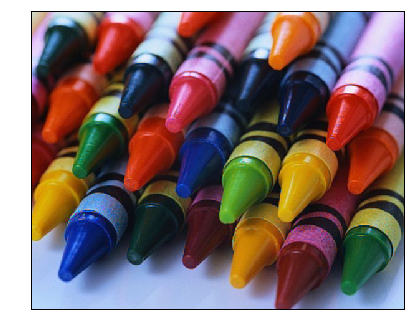

In [13]:
print(rgb_img.max())
rgb_img = rgb_img/255
plt.axis("off")
plt.imshow(rgb_img)